# SLEAP Distance Calculation

Brief 1-2 sentence description of notebook.

In [1]:
#calling it a second time may prevent some graphics errors
import matplotlib.pyplot as plt

In [2]:
import os
import glob
import sys


In [3]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib as mpl
# import matplotlib.pyplot as plt

from collections import defaultdict



In [4]:
import os 

## Inputs & Data

Explanation of each input and where it comes from.

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

In [47]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc/" # where data is saved should always be shown in the inputs
os.makedirs(OUTPUT_DIR, exist_ok=True)
OUTPUT_PREFIX = "rce_pilot_3"

In [48]:
FULL_LFP_TRACES_PKL = "{}_04_spectral_and_sleap.pkl".format(OUTPUT_PREFIX)

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [35]:
exploded_columns = pd.read_pickle("./proc/exploded_columns.pkl")


In [36]:
exploded_columns.columns

Index(['thorax_velocity_sum', 'thorax_velocity_diff', 'subject_tail_base',
       'frame_index', 'nose_to_reward_port_diff', 'video_name',
       'tone_start_to_stop_frame', 'reward_port', '10s_before_tone_frame',
       'nose_to_reward_port_sum', 'to_reward_port_angle_diff',
       'nose_to_tail_sum', 'get_reward_frame', 'agent_nose', 'agent_thorax',
       'tone_stop_frame', 'competition_closeness', 'session_dir',
       'tone_start_frame', 'box_bottom_left', 'agent_tail_base',
       'box_bottom_right', 'subject_to_reward_port_angle', 'notes',
       'box_top_left', 'box_number', 'experiment',
       'subject_nose_to_reward_port', 'first_timestamp', 'start_frame',
       'tone_stop_timestamp', 'sleap_name', 'subject_thorax_to_agent_thorax',
       '10s_after_tone_frame', 'subject_thorax', 'within_trial_frame_index',
       'tone_start_timestamp', 'all_subjects', 'agent', 'stop_frame',
       'nose_to_tail_diff', 'agent_nose_to_reward_port',
       'agent_to_reward_port_angle', 'curr

In [38]:
exploded_columns.head()

,thorax_velocity_sum,thorax_velocity_diff,subject_tail_base,frame_index,nose_to_reward_port_diff,video_name,tone_start_to_stop_frame,reward_port,10s_before_tone_frame,nose_to_reward_port_sum,...,closebool_agent_nose_to_reward_port,movingbool_subject_thorax_velocity,movingbool_agent_thorax_velocity,manual_cluster_id,standard_embedding_x,standard_embedding_y,clusterable_embedding_x,clusterable_embedding_y,kmeans_cluster,video_id
0,1.864783,1.641202,"[65.86894804065032, 31.8436244490543]",1086,29.128517,20240317_151922_long_comp_subj_3-1_and_3-3.1,"(1286, 1486)","[60.41313477701829, 37.56463736381247]",1086,30.571493,...,False,False,True,2,-2.570171,-0.481869,-2.189707,1.966187,4,0
1,0.938264,0.78134,"[65.86498651970352, 31.842588737266972]",1087,29.239168,20240317_151922_long_comp_subj_3-1_and_3-3.1,"(1286, 1486)","[60.41313477701829, 37.56463736381247]",1086,30.657799,...,False,False,True,2,-3.663163,-0.950025,-2.932820,1.766647,4,0
2,0.300687,0.158209,"[65.87072564620338, 31.843130896866835]",1088,29.328625,20240317_151922_long_comp_subj_3-1_and_3-3.1,"(1286, 1486)","[60.41313477701829, 37.56463736381247]",1086,30.738615,...,False,False,False,2,-4.050153,-0.833175,-3.094593,1.802257,4,0
3,-0.062844,-0.229304,"[66.05605372229157, 31.84940499209838]",1089,29.413448,20240317_151922_long_comp_subj_3-1_and_3-3.1,"(1286, 1486)","[60.41313477701829, 37.56463736381247]",1086,30.82523,...,False,False,False,2,-4.048223,-0.882780,-3.120238,1.702991,4,0
4,-0.214782,-0.405428,"[65.86966472606377, 31.847913118440818]",1090,29.512577,20240317_151922_long_comp_subj_3-1_and_3-3.1,"(1286, 1486)","[60.41313477701829, 37.56463736381247]",1086,30.916037,...,False,False,False,2,-4.029259,-0.994211,-3.105247,1.635060,4,0


In [39]:
grouped_exploded_columns = pd.read_pickle("./proc/grouped_exploded_columns.pkl")


In [58]:
grouped_exploded_columns.head()

,video_name,current_subject,10s_after_tone_frame,10s_before_tone_frame,agent_locations,agent_nose,agent_nose_to_reward_port,agent_tail_base,agent_thorax,agent_thorax_velocity,...,first_timestamp,last_timestamp,reward_port,session_dir,sleap_name,start_frame,stop_frame,tracked_subject,video_id,tone_start_ranges
0,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.1,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[47.329585864054316, 13.395104517336417], [4...","[[43.139588993359475, 13.385259646809214], [43...","[29.850004, 29.948483, 30.033619, 30.119339, 3...","[[54.49241922411595, 12.722769593270066], [54....","[[51.04336785027878, 11.609328010205985], [51....","[1.75459, 0.8485628, 0.20676309, -0.17881195, ...",...,2415571.0,48236575.0,"[60.41313477701829, 37.56463736381247]",20240317_151922_long_comp_subj_3-1_and_3-3,20240317_151922_long_comp_subj_3-1_and_3-3.1.f...,1,45736,"[3.1, 3.3]",0,"{1287955: [(0, 599)], 3287980: [(600, 1199)], ..."
1,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.3,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[61.390550187751444, 36.122362967315595], [5...","[[60.14673983110819, 38.0809500426292], [60.14...","[0.7214881, 0.70931464, 0.7049949, 0.705891, 0...","[[65.86894804065032, 31.8436244490543], [65.86...","[[64.11036004541992, 34.137273635147906], [64....","[0.11019329, 0.08970148, 0.09392373, 0.1159680...",...,2415571.0,48236575.0,"[60.41313477701829, 37.56463736381247]",20240317_151922_long_comp_subj_3-1_and_3-3,20240317_151922_long_comp_subj_3-1_and_3-3.1.f...,1,45736,"[3.1, 3.3]",0,"{1287955: [(0, 599)], 3287980: [(600, 1199)], ..."
2,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.2,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[61.75545079959451, 33.21821636449367], [59....","[[60.79884848875681, 35.963595797483414], [60....","[1.2679133, 1.1848546, 1.0835545, 1.0503241, 1...","[[56.32709801682682, 29.966639024342353], [56....","[[57.3449526902064, 32.078917344899914], [57.5...","[0.28695866, 0.29812592, 0.3080636, 0.34382957...",...,2020598.0,61007363.0,"[60.1935112853622, 35.25163617313764]",20240317_172017_long_comp_subj_4-2_and_4-3,20240317_172017_long_comp_subj_4-2_and_4-3.1.f...,1,58878,"[4.2, 4.3]",1,"{1302635: [(0, 600)], 3302656: [(601, 1200)], ..."
3,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.3,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[67.1750209289574, 9.986812953490931], [69.1...","[[65.23110812441777, 8.220414676017084], [62.5...","[28.389486, 28.209822, 28.007545, 27.813864, 2...","[[72.8621368084351, 13.53665765315761], [72.41...","[[72.18478668206376, 10.328978616940205], [71....","[21.16527, 21.272135, 21.302916, 21.162853, 20...",...,2020598.0,61007363.0,"[60.1935112853622, 35.25163617313764]",20240317_172017_long_comp_subj_4-2_and_4-3,20240317_172017_long_comp_subj_4-2_and_4-3.1.f...,1,58878,"[4.2, 4.3]",1,"{1302635: [(0, 600)], 3302656: [(601, 1200)], ..."
4,20240318_143819_long_comp_subj_3-3_and_3-4.1,3.3,"[1733, 1733, 1733, 1733, 1733, 1733, 1733, 173...","[1134, 1134, 1134, 1134, 1134, 1134, 1134, 113...","[[[61.29948457574409, 34.98487547102027], [61....","[[58.01061366578415, 33.98924535992776], [58.0...","[3.077167, 3.613538, 4.1945314, 4.827455, 5.53...","[[68.06216599593583, 32.37245454635553], [67.8...","[[65.57930503887175, 33.84569047638807], [65.3...","[8.288751, 9.374064, 10.581271, 11.979093, 13....",...,1938832.0,60762064.0,"[60.56358180384908, 36.19153363328459]",20240318_143819_long_comp_subj_3-3_and_3-4,20240318_143819_long_comp_subj_3-3_and_3-4.1.f...,1,58752,"[3.3, 3.4]",2,"{1300498: [(0, 598)], 3300523: [(599, 1197)], ..."


In [42]:
grouped_exploded_columns["10s_after_tone_frame"].iloc[0].shape

(17987,)

In [46]:
grouped_exploded_columns.columns

Index(['video_name', 'current_subject', '10s_after_tone_frame',
       '10s_before_tone_frame', 'agent_locations', 'agent_nose',
       'agent_nose_to_reward_port', 'agent_tail_base', 'agent_thorax',
       'agent_thorax_velocity', 'agent_to_reward_port_angle',
       'closebool_agent_nose_to_reward_port',
       'closebool_subject_nose_to_reward_port', 'clusterable_embedding_x',
       'clusterable_embedding_y', 'color', 'comp_id', 'competition_closeness',
       'competitiveness', 'condition ', 'frame_index', 'get_reward_frame',
       'kmeans_cluster', 'manual_cluster_id',
       'movingbool_agent_thorax_velocity',
       'movingbool_subject_thorax_velocity', 'nose_to_reward_port_diff',
       'nose_to_reward_port_sum', 'nose_to_tail_diff', 'nose_to_tail_sum',
       'notes', 'out_reward_frame', 'standard_embedding_x',
       'standard_embedding_y', 'subject_locations', 'subject_nose',
       'subject_nose_to_reward_port', 'subject_tail_base', 'subject_thorax',
       'subject_thora

In [48]:
import numpy as np
from collections import defaultdict

def get_repeating_ranges(arr):
    repeating_ranges = defaultdict(list)
    n = len(arr)

    i = 0
    while i < n:
        value = arr[i]
        start = i
        
        # Move to the end of the current block of repeating values
        while i < n and arr[i] == value:
            i += 1
        
        end = i - 1
        
        # If the value repeats, store the range in the dictionary
        if end > start:
            repeating_ranges[value].append((start, end))
        else:
            # Move to the next element
            i += 1
            
    return dict(repeating_ranges)

# Example usage
arr = np.array([1, 2, 2, 3, 3, 3, 4, 2, 2, 5])
repeating_ranges = get_repeating_ranges(arr)
print(repeating_ranges)

{np.int64(3): [(4, 5)]}


In [50]:
grouped_exploded_columns["tone_start_timestamp"] = grouped_exploded_columns["tone_start_timestamp"].apply(lambda x: x.astype(int))

In [52]:
grouped_exploded_columns["tone_start_ranges"] = grouped_exploded_columns["tone_start_timestamp"].apply(lambda x: get_repeating_ranges(x))

# Calculating relationship between win/lose ratio and competitiveness

In [59]:
grouped_exploded_columns.columns

Index(['video_name', 'current_subject', '10s_after_tone_frame',
       '10s_before_tone_frame', 'agent_locations', 'agent_nose',
       'agent_nose_to_reward_port', 'agent_tail_base', 'agent_thorax',
       'agent_thorax_velocity', 'agent_to_reward_port_angle',
       'closebool_agent_nose_to_reward_port',
       'closebool_subject_nose_to_reward_port', 'clusterable_embedding_x',
       'clusterable_embedding_y', 'color', 'comp_id', 'competition_closeness',
       'competitiveness', 'condition ', 'frame_index', 'get_reward_frame',
       'kmeans_cluster', 'manual_cluster_id',
       'movingbool_agent_thorax_velocity',
       'movingbool_subject_thorax_velocity', 'nose_to_reward_port_diff',
       'nose_to_reward_port_sum', 'nose_to_tail_diff', 'nose_to_tail_sum',
       'notes', 'out_reward_frame', 'standard_embedding_x',
       'standard_embedding_y', 'subject_locations', 'subject_nose',
       'subject_nose_to_reward_port', 'subject_tail_base', 'subject_thorax',
       'subject_thora

In [67]:
grouped_exploded_columns["condition "] = grouped_exploded_columns["condition "].apply(lambda x: x.astype(str))

In [68]:
grouped_exploded_columns["current_subject"] = grouped_exploded_columns["current_subject"].astype(str)

In [69]:
grouped_exploded_columns["trial_label"] = grouped_exploded_columns.apply(lambda x: np.array(["win" if cond == x["current_subject"] else ("lose" if cond == x["agent"] else cond) for cond in x["condition "]]), axis=1)
                                                                         

In [70]:
grouped_exploded_columns["condition "].head()

0    [3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, ...
1    [3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, ...
2    [4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, ...
3    [4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, ...
4    [3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, ...
Name: condition , dtype: object

In [71]:
grouped_exploded_columns["trial_label"].head()

0    [lose, lose, lose, lose, lose, lose, lose, los...
1    [win, win, win, win, win, win, win, win, win, ...
2    [win, win, win, win, win, win, win, win, win, ...
3    [lose, lose, lose, lose, lose, lose, lose, los...
4    [lose, lose, lose, lose, lose, lose, lose, los...
Name: trial_label, dtype: object

In [72]:
grouped_exploded_columns["competition_closeness"].head()

0    [Subj 2 then Subj 1, Subj 2 then Subj 1, Subj ...
1    [Subj 2 then Subj 1, Subj 2 then Subj 1, Subj ...
2    [Subj 1 then Subj 2, Subj 1 then Subj 2, Subj ...
3    [Subj 1 then Subj 2, Subj 1 then Subj 2, Subj ...
4    [Subj 2 Only, Subj 2 Only, Subj 2 Only, Subj 2...
Name: competition_closeness, dtype: object

In [74]:
np.unique(grouped_exploded_columns["competition_closeness"].iloc[0])

array(['Subj 1 Only', 'Subj 1 blocking Subj 2', 'Subj 1 then Subj 2',
       'Subj 2 blocking Subj 1', 'Subj 2 then Subj 1'], dtype='<U22')

In [75]:
competitiveness_dictionary = {"Subj 1 Only": "non_comp",
"Subj 2 Only": "non_comp",
"Close Call": "competitive",
"Subj 1 then Subj 2": "competitive",
"Subj 2 then Subj 1": "competitive",
"Subj 1 blocking Subj 2": "competitive",
"Subj 2 blocking Subj 1": "competitive",
"After trial": "After trial"}

In [77]:

grouped_exploded_columns["competition_label"] = grouped_exploded_columns["competition_closeness"].apply(lambda x: np.vectorize(competitiveness_dictionary.get)(x))

In [101]:
grouped_exploded_columns["per_trial_competition_label"] = grouped_exploded_columns.apply(lambda x: [str(x["competition_label"][value[0][0]]) for key, value in x["tone_start_ranges"].items()], axis=1)

In [102]:
grouped_exploded_columns["per_trial_trial_label"] = grouped_exploded_columns.apply(lambda x: [str(x["trial_label"][value[0][0]]) for key, value in x["tone_start_ranges"].items()], axis=1)

In [103]:
grouped_exploded_columns["per_trial_competition_label"].iloc[0]

['competitive',
 'non_comp',
 'non_comp',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive']

In [104]:
grouped_exploded_columns["per_trial_trial_label"].iloc[0]

['lose',
 'win',
 'win',
 'win',
 'win',
 'lose',
 'win',
 'lose',
 'win',
 'win',
 'win',
 'win',
 'lose',
 'lose',
 'lose',
 'lose',
 'win',
 'lose',
 'win',
 'win',
 'lose',
 'win',
 'lose',
 'lose',
 'win',
 'lose',
 'win',
 'win',
 'win',
 'win']

In [106]:
grouped_exploded_columns["per_trial_competition_label"].apply(lambda x: np.unique(x))

0                  [competitive, non_comp]
1                  [competitive, non_comp]
2                  [competitive, non_comp]
3                  [competitive, non_comp]
4                  [competitive, non_comp]
5                  [competitive, non_comp]
6                  [competitive, non_comp]
7                  [competitive, non_comp]
8            [None, competitive, non_comp]
9            [None, competitive, non_comp]
10                 [competitive, non_comp]
11                 [competitive, non_comp]
12                 [competitive, non_comp]
13                 [competitive, non_comp]
14    [After trial, competitive, non_comp]
15    [After trial, competitive, non_comp]
16                 [competitive, non_comp]
17                 [competitive, non_comp]
18                 [competitive, non_comp]
19                 [competitive, non_comp]
20    [After trial, competitive, non_comp]
21    [After trial, competitive, non_comp]
22                 [competitive, non_comp]
23         

In [107]:
grouped_exploded_columns["per_trial_trial_label"].apply(lambda x: np.unique(x))

0          [lose, win]
1          [lose, win]
2     [lose, tie, win]
3     [lose, tie, win]
4               [lose]
5                [win]
6     [lose, tie, win]
7     [lose, tie, win]
8     [lose, tie, win]
9     [lose, tie, win]
10    [lose, tie, win]
11    [lose, tie, win]
12    [lose, tie, win]
13    [lose, tie, win]
14         [lose, tie]
15          [tie, win]
16    [lose, tie, win]
17    [lose, tie, win]
18         [lose, win]
19         [lose, win]
20         [lose, win]
21         [lose, win]
22         [lose, tie]
23          [tie, win]
24    [lose, tie, win]
25    [lose, tie, win]
26    [lose, tie, win]
27    [lose, tie, win]
Name: per_trial_trial_label, dtype: object

In [109]:
grouped_exploded_columns["per_trial_trial_label"].apply(lambda x: len(x))

0     30
1     30
2     41
3     41
4     41
5     41
6     41
7     41
8     41
9     41
10    41
11    41
12    21
13    21
14    21
15    21
16    41
17    41
18    21
19    21
20    21
21    21
22    21
23    21
24    21
25    21
26    18
27    18
Name: per_trial_trial_label, dtype: int64

In [110]:
grouped_exploded_columns["per_trial_competition_label"].apply(lambda x: len(x))

0     30
1     30
2     41
3     41
4     41
5     41
6     41
7     41
8     41
9     41
10    41
11    41
12    21
13    21
14    21
15    21
16    41
17    41
18    21
19    21
20    21
21    21
22    21
23    21
24    21
25    21
26    18
27    18
Name: per_trial_competition_label, dtype: int64

In [111]:
grouped_exploded_columns["trial_comp_tuple"] = grouped_exploded_columns.apply(lambda x: list(zip(x["per_trial_trial_label"], x["per_trial_competition_label"])), axis=1)

In [114]:
grouped_exploded_columns["trial_comp_tuple"] = grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: [tup for tup in x if all("After" not in item for item in tup)])

In [115]:
grouped_exploded_columns["trial_comp_tuple"] = grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: [tup for tup in x if all("tie" not in item for item in tup)])

In [116]:
grouped_exploded_columns["trial_comp_tuple"]

0     [(lose, competitive), (win, non_comp), (win, n...
1     [(win, competitive), (lose, non_comp), (lose, ...
2     [(win, competitive), (lose, competitive), (los...
3     [(lose, competitive), (win, competitive), (win...
4     [(lose, non_comp), (lose, non_comp), (lose, no...
5     [(win, non_comp), (win, non_comp), (win, non_c...
6     [(win, competitive), (lose, competitive), (los...
7     [(lose, competitive), (win, competitive), (win...
8     [(win, non_comp), (win, competitive), (win, co...
9     [(lose, non_comp), (lose, competitive), (lose,...
10    [(win, competitive), (lose, competitive), (win...
11    [(lose, competitive), (win, competitive), (los...
12    [(win, non_comp), (win, competitive), (lose, n...
13    [(lose, non_comp), (lose, competitive), (win, ...
14    [(lose, non_comp), (lose, competitive), (lose,...
15    [(win, non_comp), (win, competitive), (win, co...
16    [(lose, non_comp), (win, competitive), (lose, ...
17    [(win, non_comp), (lose, competitive), (wi

In [118]:
from collections import Counter

In [119]:
grouped_exploded_columns["trial_counts"] = grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: Counter([tup[0] for tup in x]))

In [122]:
grouped_exploded_columns["comp_counts"] = grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: Counter([tup[1] for tup in x]))

In [135]:
grouped_exploded_columns.head()

,video_name,current_subject,10s_after_tone_frame,10s_before_tone_frame,agent_locations,agent_nose,agent_nose_to_reward_port,agent_tail_base,agent_thorax,agent_thorax_velocity,...,trial_label,competition_label,per_trial_competition_label,per_trial_trial_label,trial_comp_tuple,trial_counts,comp_counts,trial_ratios,comp_ratios,dominance_ratios
0,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.1,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[47.329585864054316, 13.395104517336417], [4...","[[43.139588993359475, 13.385259646809214], [43...","[29.850004, 29.948483, 30.033619, 30.119339, 3...","[[54.49241922411595, 12.722769593270066], [54....","[[51.04336785027878, 11.609328010205985], [51....","[1.75459, 0.8485628, 0.20676309, -0.17881195, ...",...,"[lose, lose, lose, lose, lose, lose, lose, los...","[competitive, competitive, competitive, compet...","[competitive, non_comp, non_comp, competitive,...","[lose, win, win, win, win, lose, win, lose, wi...","[(lose, competitive), (win, non_comp), (win, n...","{'lose': 12, 'win': 18}","{'competitive': 28, 'non_comp': 2}","{'lose': 0.4, 'win': 0.6}","{'competitive': 0.9333333333333333, 'non_comp'...",0.200000
1,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.3,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[61.390550187751444, 36.122362967315595], [5...","[[60.14673983110819, 38.0809500426292], [60.14...","[0.7214881, 0.70931464, 0.7049949, 0.705891, 0...","[[65.86894804065032, 31.8436244490543], [65.86...","[[64.11036004541992, 34.137273635147906], [64....","[0.11019329, 0.08970148, 0.09392373, 0.1159680...",...,"[win, win, win, win, win, win, win, win, win, ...","[competitive, competitive, competitive, compet...","[competitive, non_comp, non_comp, competitive,...","[win, lose, lose, lose, lose, win, lose, win, ...","[(win, competitive), (lose, non_comp), (lose, ...","{'win': 12, 'lose': 18}","{'competitive': 28, 'non_comp': 2}","{'win': 0.4, 'lose': 0.6}","{'competitive': 0.9333333333333333, 'non_comp'...",0.200000
2,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.2,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[61.75545079959451, 33.21821636449367], [59....","[[60.79884848875681, 35.963595797483414], [60....","[1.2679133, 1.1848546, 1.0835545, 1.0503241, 1...","[[56.32709801682682, 29.966639024342353], [56....","[[57.3449526902064, 32.078917344899914], [57.5...","[0.28695866, 0.29812592, 0.3080636, 0.34382957...",...,"[win, win, win, win, win, win, win, win, win, ...","[competitive, competitive, competitive, compet...","[competitive, competitive, competitive, compet...","[win, lose, lose, lose, lose, lose, lose, lose...","[(win, competitive), (lose, competitive), (los...","{'win': 6, 'lose': 33}","{'competitive': 36, 'non_comp': 3}","{'win': 0.15384615384615385, 'lose': 0.8461538...","{'competitive': 0.9230769230769231, 'non_comp'...",0.692308
3,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.3,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[67.1750209289574, 9.986812953490931], [69.1...","[[65.23110812441777, 8.220414676017084], [62.5...","[28.389486, 28.209822, 28.007545, 27.813864, 2...","[[72.8621368084351, 13.53665765315761], [72.41...","[[72.18478668206376, 10.328978616940205], [71....","[21.16527, 21.272135, 21.302916, 21.162853, 20...",...,"[lose, lose, lose, lose, lose, lose, lose, los...","[competitive, competitive, competitive, compet...","[competitive, competitive, competitive, compet...","[lose, win, win, win, win, win, win, win, win,...","[(lose, competitive), (win, competitive), (win...","{'lose': 6, 'win': 33}","{'competitive': 36, 'non_comp': 3}","{'lose': 0.15384615384615385, 'win': 0.8461538...","{'competitive': 0.9230769230769231, 'non_comp'...",0.692308
4,20240318_143819_long_comp_subj_3-3_and_3-4.1,3.3,"[1733, 1733, 1733, 1733, 17

In [124]:
grouped_exploded_columns["trial_ratios"] = grouped_exploded_columns["trial_counts"].apply(lambda x: {key: value/sum(x.values()) for key, value in x.items()})

In [125]:
grouped_exploded_columns["comp_ratios"] = grouped_exploded_columns["comp_counts"].apply(lambda x: {key: value/sum(x.values()) for key, value in x.items()})

In [127]:
grouped_exploded_columns["dominance_ratios"] = grouped_exploded_columns["trial_counts"].apply(lambda x: np.abs((x.get("win", 0) - x.get("lose", 0))/sum(x.values())))

In [129]:
grouped_exploded_columns["dominance_ratios"].head()

0    0.200000
1    0.200000
2    0.692308
3    0.692308
4    1.000000
Name: dominance_ratios, dtype: float64

In [131]:
grouped_exploded_columns["trial_ratios"].head()

0                            {'lose': 0.4, 'win': 0.6}
1                            {'win': 0.4, 'lose': 0.6}
2    {'win': 0.15384615384615385, 'lose': 0.8461538...
3    {'lose': 0.15384615384615385, 'win': 0.8461538...
4                                        {'lose': 1.0}
Name: trial_ratios, dtype: object

In [132]:
grouped_exploded_columns["comp_ratios"].head()

0    {'competitive': 0.9333333333333333, 'non_comp'...
1    {'competitive': 0.9333333333333333, 'non_comp'...
2    {'competitive': 0.9230769230769231, 'non_comp'...
3    {'competitive': 0.9230769230769231, 'non_comp'...
4    {'non_comp': 0.6341463414634146, 'competitive'...
Name: comp_ratios, dtype: object

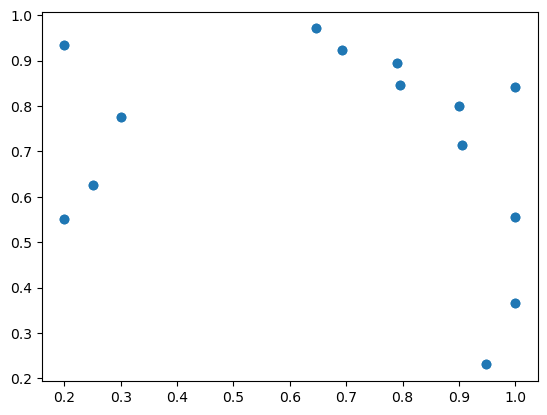

In [134]:
plt.plot(grouped_exploded_columns["dominance_ratios"], grouped_exploded_columns["comp_ratios"].apply(lambda x: x.get("competitive", 0)), 'o')

# Looking at distances through out the different trials

In [137]:
grouped_exploded_columns.head()

,video_name,current_subject,10s_after_tone_frame,10s_before_tone_frame,agent_locations,agent_nose,agent_nose_to_reward_port,agent_tail_base,agent_thorax,agent_thorax_velocity,...,trial_label,competition_label,per_trial_competition_label,per_trial_trial_label,trial_comp_tuple,trial_counts,comp_counts,trial_ratios,comp_ratios,dominance_ratios
0,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.1,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[47.329585864054316, 13.395104517336417], [4...","[[43.139588993359475, 13.385259646809214], [43...","[29.850004, 29.948483, 30.033619, 30.119339, 3...","[[54.49241922411595, 12.722769593270066], [54....","[[51.04336785027878, 11.609328010205985], [51....","[1.75459, 0.8485628, 0.20676309, -0.17881195, ...",...,"[lose, lose, lose, lose, lose, lose, lose, los...","[competitive, competitive, competitive, compet...","[competitive, non_comp, non_comp, competitive,...","[lose, win, win, win, win, lose, win, lose, wi...","[(lose, competitive), (win, non_comp), (win, n...","{'lose': 12, 'win': 18}","{'competitive': 28, 'non_comp': 2}","{'lose': 0.4, 'win': 0.6}","{'competitive': 0.9333333333333333, 'non_comp'...",0.200000
1,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.3,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[61.390550187751444, 36.122362967315595], [5...","[[60.14673983110819, 38.0809500426292], [60.14...","[0.7214881, 0.70931464, 0.7049949, 0.705891, 0...","[[65.86894804065032, 31.8436244490543], [65.86...","[[64.11036004541992, 34.137273635147906], [64....","[0.11019329, 0.08970148, 0.09392373, 0.1159680...",...,"[win, win, win, win, win, win, win, win, win, ...","[competitive, competitive, competitive, compet...","[competitive, non_comp, non_comp, competitive,...","[win, lose, lose, lose, lose, win, lose, win, ...","[(win, competitive), (lose, non_comp), (lose, ...","{'win': 12, 'lose': 18}","{'competitive': 28, 'non_comp': 2}","{'win': 0.4, 'lose': 0.6}","{'competitive': 0.9333333333333333, 'non_comp'...",0.200000
2,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.2,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[61.75545079959451, 33.21821636449367], [59....","[[60.79884848875681, 35.963595797483414], [60....","[1.2679133, 1.1848546, 1.0835545, 1.0503241, 1...","[[56.32709801682682, 29.966639024342353], [56....","[[57.3449526902064, 32.078917344899914], [57.5...","[0.28695866, 0.29812592, 0.3080636, 0.34382957...",...,"[win, win, win, win, win, win, win, win, win, ...","[competitive, competitive, competitive, compet...","[competitive, competitive, competitive, compet...","[win, lose, lose, lose, lose, lose, lose, lose...","[(win, competitive), (lose, competitive), (los...","{'win': 6, 'lose': 33}","{'competitive': 36, 'non_comp': 3}","{'win': 0.15384615384615385, 'lose': 0.8461538...","{'competitive': 0.9230769230769231, 'non_comp'...",0.692308
3,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.3,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[67.1750209289574, 9.986812953490931], [69.1...","[[65.23110812441777, 8.220414676017084], [62.5...","[28.389486, 28.209822, 28.007545, 27.813864, 2...","[[72.8621368084351, 13.53665765315761], [72.41...","[[72.18478668206376, 10.328978616940205], [71....","[21.16527, 21.272135, 21.302916, 21.162853, 20...",...,"[lose, lose, lose, lose, lose, lose, lose, los...","[competitive, competitive, competitive, compet...","[competitive, competitive, competitive, compet...","[lose, win, win, win, win, win, win, win, win,...","[(lose, competitive), (win, competitive), (win...","{'lose': 6, 'win': 33}","{'competitive': 36, 'non_comp': 3}","{'lose': 0.15384615384615385, 'win': 0.8461538...","{'competitive': 0.9230769230769231, 'non_comp'...",0.692308
4,20240318_143819_long_comp_subj_3-3_and_3-4.1,3.3,"[1733, 1733, 1733, 1733, 17

In [139]:
grouped_exploded_columns["tone_start_ranges"]

0     {1287955: [(0, 599)], 3287980: [(600, 1199)], ...
1     {1287955: [(0, 599)], 3287980: [(600, 1199)], ...
2     {1302635: [(0, 600)], 3302656: [(601, 1200)], ...
3     {1302635: [(0, 600)], 3302656: [(601, 1200)], ...
4     {1300498: [(0, 598)], 3300523: [(599, 1197)], ...
5     {1300498: [(0, 598)], 3300523: [(599, 1197)], ...
6     {1378134: [(0, 598)], 3378158: [(599, 1197)], ...
7     {1378134: [(0, 598)], 3378158: [(599, 1197)], ...
8     {1543730: [(0, 599)], 3543754: [(600, 1198)], ...
9     {1543730: [(0, 599)], 3543754: [(600, 1198)], ...
10    {1362950: [(0, 598)], 3362973: [(599, 1197)], ...
11    {1362950: [(0, 598)], 3362973: [(599, 1197)], ...
12    {34276299: [(0, 599)], 35276311: [(600, 1198)]...
13    {34276299: [(0, 599)], 35276311: [(600, 1198)]...
14    {34280576: [(0, 599)], 35280586: [(600, 1197)]...
15    {34280576: [(0, 599)], 35280586: [(600, 1197)]...
16    {1305657: [(0, 598)], 3305682: [(599, 1197)], ...
17    {1305657: [(0, 598)], 3305682: [(599, 1197

In [140]:
grouped_exploded_columns.columns

Index(['video_name', 'current_subject', '10s_after_tone_frame',
       '10s_before_tone_frame', 'agent_locations', 'agent_nose',
       'agent_nose_to_reward_port', 'agent_tail_base', 'agent_thorax',
       'agent_thorax_velocity', 'agent_to_reward_port_angle',
       'closebool_agent_nose_to_reward_port',
       'closebool_subject_nose_to_reward_port', 'clusterable_embedding_x',
       'clusterable_embedding_y', 'color', 'comp_id', 'competition_closeness',
       'competitiveness', 'condition ', 'frame_index', 'get_reward_frame',
       'kmeans_cluster', 'manual_cluster_id',
       'movingbool_agent_thorax_velocity',
       'movingbool_subject_thorax_velocity', 'nose_to_reward_port_diff',
       'nose_to_reward_port_sum', 'nose_to_tail_diff', 'nose_to_tail_sum',
       'notes', 'out_reward_frame', 'standard_embedding_x',
       'standard_embedding_y', 'subject_locations', 'subject_nose',
       'subject_nose_to_reward_port', 'subject_tail_base', 'subject_thorax',
       'subject_thora

In [141]:
grouped_exploded_columns["subject_nose_to_reward_port"]

0     [0.7214881, 0.70931464, 0.7049949, 0.705891, 0...
1     [29.850004, 29.948483, 30.033619, 30.119339, 3...
2     [28.389486, 28.209822, 28.007545, 27.813864, 2...
3     [1.2679133, 1.1848546, 1.0835545, 1.0503241, 1...
4     [24.534853, 25.094938, 25.67771, 26.315487, 26...
5     [3.077167, 3.613538, 4.1945314, 4.827455, 5.53...
6     [0.82970977, 0.8598264, 0.83969253, 0.8039358,...
7     [22.7941, 21.898111, 21.125622, 20.455793, 19....
8     [1.6779662, 1.6482923, 1.6355497, 1.643355, 1....
9     [23.692768, 23.715914, 23.750025, 23.730267, 2...
10    [0.9762379, 0.9359673, 1.0277683, 1.0087196, 0...
11    [5.6082964, 6.1086493, 6.6007996, 7.2192454, 8...
12    [0.53517926, 0.50113046, 0.48567954, 0.4737239...
13    [4.960474, 5.34718, 5.802983, 6.407976, 7.1417...
14    [2.1410906, 2.5980964, 3.2073143, 3.9916637, 4...
15    [1.4890755, 1.1949695, 0.93336076, 0.738537, 0...
16    [14.46114, 14.746575, 14.93008, 15.023095, 14....
17    [1.9402401, 1.9846554, 1.9959631, 2.012453

In [151]:
grouped_exploded_columns["tone_start_to_subject_nose_to_reward_port"] = grouped_exploded_columns.apply(
    lambda x: {int(key): np.array(x["subject_nose_to_reward_port"][value[0][0]:value[0][1]]) 
               for key, value in x["tone_start_ranges"].items()}, 
    axis=1
)

In [152]:
grouped_exploded_columns["tone_start_to_subject_nose_to_reward_port"].iloc[0]

{1287955: array([ 0.7214881 ,  0.70931464,  0.7049949 ,  0.705891  ,  0.7017305 ,
         0.70016795,  0.70483816,  0.7086976 ,  0.71235824,  0.724132  ,
         0.73129696,  0.73436135,  0.7214044 ,  0.70517224,  0.69450194,
         0.69102955,  0.68216026,  0.68119663,  0.68244374,  0.6789723 ,
         0.6836346 ,  0.67474174,  0.6718054 ,  0.66870946,  0.66089654,
         0.6608701 ,  0.6565051 ,  0.6588305 ,  0.66162515,  0.6728285 ,
         0.70605975,  0.7319365 ,  0.75448656,  0.7541302 ,  0.7258267 ,
         0.7046141 ,  0.6711859 ,  0.63371956,  0.58457327,  0.5401432 ,
         0.50126064,  0.46873394,  0.4415003 ,  0.41945234,  0.40478685,
         0.39677194,  0.40054616,  0.408272  ,  0.42047536,  0.44439453,
         0.4685906 ,  0.5047511 ,  0.54173917,  0.58467656,  0.6257907 ,
         0.6514777 ,  0.65822   ,  0.6542138 ,  0.6473289 ,  0.6581947 ,
         0.6429685 ,  0.6364559 ,  0.61546075,  0.5983074 ,  0.58372575,
         0.5631885 ,  0.5718757 ,  0.57933

In [153]:
grouped_exploded_columns["tone_start_to_subject_thorax_velocity"] = grouped_exploded_columns.apply(
    lambda x: {int(key): np.array(x["subject_thorax_velocity"][value[0][0]:value[0][1]]) 
               for key, value in x["tone_start_ranges"].items()}, 
    axis=1
)

In [154]:
grouped_exploded_columns["tone_start_to_subject_thorax_velocity"]

0     {1287955: [0.11019329, 0.08970148, 0.09392373,...
1     {1287955: [1.75459, 0.8485628, 0.20676309, -0....
2     {1302635: [21.16527, 21.272135, 21.302916, 21....
3     {1302635: [0.28695866, 0.29812592, 0.3080636, ...
4     {1300498: [18.50214, 19.989967, 20.847054, 21....
5     {1300498: [8.288751, 9.374064, 10.581271, 11.9...
6     {1378134: [0.49387693, 0.49644837, 0.5001923, ...
7     {1378134: [13.075028, 13.608783, 14.016561, 14...
8     {1543730: [1.8629384, 2.0149834, 2.18604, 2.36...
9     {1543730: [0.5855292, 0.59718263, 0.5840463, 0...
10    {1362950: [0.5103662, 0.50726616, 0.47757867, ...
11    {1362950: [2.8851588, 3.0568676, 3.2275608, 3....
12    {34276299: [0.07300971, 0.08296164, 0.08879429...
13    {34276299: [7.0735817, 9.794592, 12.977724, 16...
14    {34280576: [5.105928, 5.1050973, 5.082959, 5.0...
15    {34280576: [10.536535, 10.738277, 10.965685, 1...
16    {1305657: [7.407893, 6.8694043, 6.1963964, 5.4...
17    {1305657: [0.9694598, 0.90189916, 0.863832

In [155]:
grouped_exploded_columns["per_trial_competition_label"] = grouped_exploded_columns.apply(lambda x: {key: str(x["competition_label"][value[0][0]]) for key, value in x["tone_start_ranges"].items()}, axis=1)

In [169]:
grouped_exploded_columns["per_trial_competition_label"] = grouped_exploded_columns["per_trial_competition_label"].apply(lambda x: {str(key): value for key, value in x.items() if "After" not in value})

In [166]:
grouped_exploded_columns["per_trial_trial_label"] = grouped_exploded_columns.apply(lambda x: {key: str(x["trial_label"][value[0][0]]) for key, value in x["tone_start_ranges"].items()}, axis=1)

In [167]:
grouped_exploded_columns["per_trial_trial_label"] = grouped_exploded_columns["per_trial_trial_label"].apply(lambda x: {str(key): value for key, value in x.items() if "tie" not in value})

In [ ]:
raise ValueError("Stop here")

In [ ]:
grouped_exploded_columns["per_trial_trial_label"].iloc[2]

In [ ]:
grouped_exploded_columns["trial_comp_tuple"] = grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: [tup for tup in x if all("After" not in item for item in tup)])

In [ ]:
grouped_exploded_columns["trial_comp_tuple"] = grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: [tup for tup in x if all("tie" not in item for item in tup)])

In [ ]:
grouped_exploded_columns["tone_start_to_trial_label"] = grouped_exploded_columns.apply()